In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [26]:
results = np.load("./models/common_words/save/results.npy")
wanted =  np.load("./models/common_words/save/wanted.npy")

In [31]:
y = results[0][0]
y_ = wanted[0][0]

assert y.shape == y_.shape

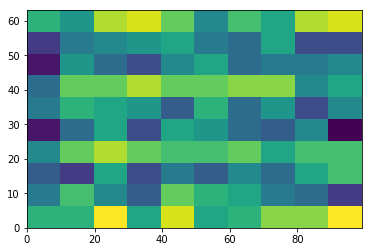

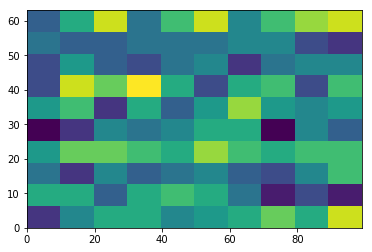

In [128]:
new_y_tot = []
i = 0
todo = 500
seq_len = 500
new_y = []
xcoords = []
ycoords = []

for chunk in results[0][0:todo]:
    j = 0
    for num in chunk[:seq_len]:
        if num == 1:
            new_y.append([i, j])
            xcoords.append(i)
            ycoords.append(j)
        j += 1
    i += 1

xcoords_wanted = []
ycoords_wanted = []
    
i = 0
for chunk in wanted[0][0:todo] :
    j = 0
    for num in chunk[:seq_len]:
        if num == 1:
            new_y.append([i, j])
            xcoords_wanted.append(i)
            ycoords_wanted.append(j)
        j += 1
    i += 1
    
# print(new_y)
    
# plt.imshow(new_y, cmap="hot")

# xlocs, xlabs = plt.xticks()
# # plt.xticks(range(0,todo+1), range(0, todo+1))
# # plt.yticks(range(0,seq_len+1), range(0, seq_len+1))

# plt.show()

plt.hist2d(xcoords, ycoords)
plt.show()

plt.hist2d(xcoords_wanted, ycoords_wanted)
plt.show()

(5, 100, 64)


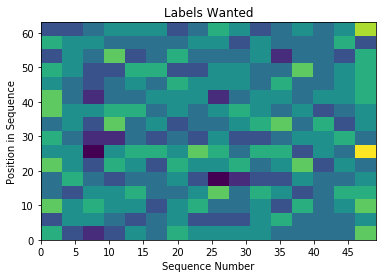

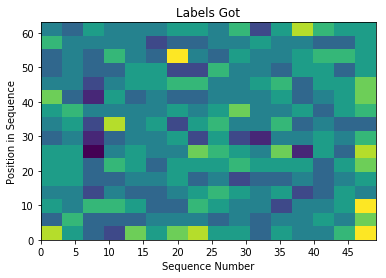

In [177]:
print(results.shape)
todo = 50
have = np.reshape(results, [-1, results.shape[2]])[:todo]
want = np.reshape(wanted, [-1, results.shape[2]])[:todo]


want_coord = [[], []]
have_coord = [[], []]


    
i = 0

for h, w in zip(have, want):
    j = 0
    
    for h_num, w_num in zip(h, w):
        if h_num == 1:
            have_coord[0].append(i)
            have_coord[1].append(j)
        if w_num == 1:
            want_coord[0].append(i)
            want_coord[1].append(j)
        j += 1
    i += 1


nbins = 16
    
plt.hist2d(want_coord[0], want_coord[1], bins=nbins)
plt.title("Labels Wanted")
plt.ylabel("Position in Sequence")
plt.xlabel("Sequence Number")
plt.xticks(range(0,len(want), 5), range(0, len(want), 5))
plt.show()

plt.hist2d(have_coord[0], have_coord[1], bins=nbins)
plt.title("Labels Got")
plt.ylabel("Position in Sequence")
plt.xlabel("Sequence Number")
plt.xticks(range(0,len(want), 5), range(0, len(want), 5))

plt.show()

[[False False False ..., False False False]
 [ True False False ..., False False False]
 [False False  True ...,  True False False]
 ..., 
 [False False False ..., False False False]
 [False False  True ..., False  True False]
 [False  True False ..., False  True False]]
Want shape (50, 64)
tp_tn shape:  (50, 64)


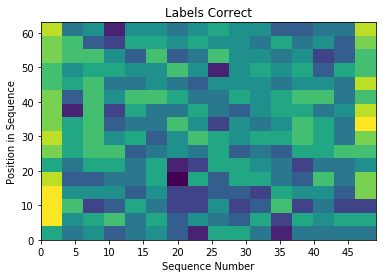

In [218]:
tp = np.logical_and(have.astype("bool"), want.astype("bool"))

print(tp)

tn = np.logical_and(np.logical_not(have.astype("bool")), np.logical_not(want.astype("bool")))



tp_tn = np.logical_or(tp, tn)
tp_tn_coords = [[], []]

i = 0
print("Want shape", want.shape)
print("tp_tn shape: ", tn.shape)


for chunk in tp_tn[0:todo] :
    j = 0
    for val in chunk[:seq_len]:
#         print (val)
        if val:
            tp_tn_coords[0].append(i)
            tp_tn_coords[1].append(j)
        j += 1
    i += 1

nbins = 16

plt.hist2d(tp_tn_coords[0], tp_tn_coords[1], bins=nbins)
plt.title("Labels Correct")
plt.ylabel("Position in Sequence")
plt.xlabel("Sequence Number")
plt.xticks(range(0,len(want), 5), range(0, len(want), 5))
plt.show()

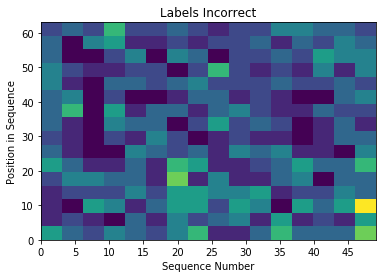

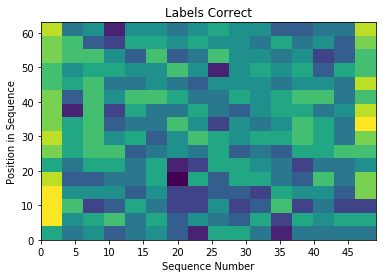

In [224]:
fp = np.logical_and(have.astype("bool"), np.logical_not(want.astype("bool")))

fn = np.logical_and(np.logical_not(have), want)

fp_fn = np.logical_or(fp, fn)
fp_fn_coords = [[], []]

tp = np.logical_and(have.astype("bool"), want.astype("bool"))
tn = np.logical_and(np.logical_not(have.astype("bool")), np.logical_not(want.astype("bool")))

tp_tn = np.logical_or(tp, tn)
tp_tn_coords = [[], []]


i = 0
for bad, good in zip(fp_fn[0:todo], tp_tn[0:todo]):
    j = 0
    for g, b in zip(good[:seq_len], bad[:seq_len]):
#         print (val)
        if b:
            fp_fn_coords[0].append(i)
            fp_fn_coords[1].append(j)
        if g:
            tp_tn_coords[0].append(i)
            tp_tn_coords[1].append(j)

        j += 1
    i += 1

nbins = 16

fig = plt.figure()
plt.hist2d(fp_fn_coords[0], fp_fn_coords[1], bins=nbins)
plt.title("Labels Incorrect")
plt.ylabel("Position in Sequence")
plt.xlabel("Sequence Number")
plt.xticks(range(0,len(want), 5), range(0, len(want), 5))
plt.show()


fig.savefig('figures/labels_wrong.png', dpi=fig.dpi)

fig = plt.figure()                     
plt.hist2d(tp_tn_coords[0], tp_tn_coords[1], bins=nbins)
plt.title("Labels Correct")
plt.ylabel("Position in Sequence")
plt.xlabel("Sequence Number")
plt.xticks(range(0,len(want), 5), range(0, len(want), 5))
plt.show()


fig.savefig('figures/labels_right.png', dpi=fig.dpi)

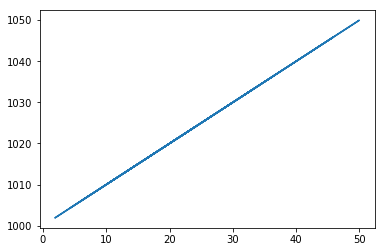

In [235]:
data = np.random.random(25)
data = np.multiply(data, 50)

plt.plot(data, data + 1000)

plt.show()